# Data Fitting (Least squares)
#### Computational Physics
#### Dr. Zhibo Zhang, Physics Department

In [6]:
# Import the necessary libraries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import display, Image
%matplotlib inline

## 1. Introduction

In physics, very often we need to investigate whether there is any potential connection between two (or more) phenomena (for example, increase of CO2 concentration in the atmosphere and the global warming), and if they are connected what are the underlying mechanisms. As a start, we usually make or are given some data that can help us characterize the phenomena (e.g., CO2 mixing ratio and global sea surface temperature). After we got data,  we need to "fit" a line or a curve through the data to find relations and build a **model** to describe the physics revealed by the data. This "data fitting" is a process of fitting a model (e.g., a straight line or a curve), expressed in terms of a mathematical function, that depends on adjustable parameters to a series of data points and once adjusted, that curve has the best fit to the data points.   

The **model** can be an arbitrary class of functions such as polynomials and the fit would determine the polynomial coefficients to simplily summarize the data or the model parameters can represent a underlying theory that the data are supposed to satisfy such as fitting an exponential function to data of a decay process to determine its decay rate or a parabola to the position data of an object falling to determine the gravity acceleration.

The general approach to the fitting procedure involves the definition of a merit function that measures the agreement between data and model. The model parameters are then adjusted to yield the best-fit parameters as a problem of minimization. A fitting procedure should provide 
1.  parameters, 
2. error estimates on the parameters, and 
3. a statistical measure of goodness-of-fit. 

When the third item suggests that the model is an unlikely match to the data, then items (1) and (2) are probably worthless.   




### Statement of Problem and Basic Definitions

#### Objectives
Consider $ n $ data points $(x_i, y_i),\: i=1, \dots , n$, where $x_i$ is the independent variable (or predictor) and $y_i$ is the dependent variable (or response) to be fitted by a model function $y$ 

$$
y=f(x | \beta_1 \dots \beta_{m})
$$

where  $\beta_i,\: i=1, \dots , m$.  are  $m$ adjustable parameters.

**Our objective is to find an optimal set of parameter values for the model which "best fits" the data.**  But what do we mean by "best fits"?  

#### Least Squares

A classical solution is to find the best fit by minimizing the sum of the squared differences between data points and the model function (the sum of squared residuals as the merit function), which is known as the **least-squares fit**:
$$ 
\sum_{i=1}^{n} \left[ y_i - f(x | \beta_1 \dots \beta_{m}) \right]^2 \;\;\;\;\;\; \mathrm{minimize\; over:} \;\;\; \beta_1 \dots \beta_{m} 
$$ 

As shown in the figure below, the least-squares are the sum of the vertical distances from each data point to the fitted curve. 

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Linear_least_squares_example2.svg", width = 400>

####Chi-Square
In reality, all data have uncertainties and possibly errors. When fitting the data, we want to reduce the influnce of "bad" data point with large uncertainty. To accout for data uncertainty, we usually use the so-called Chi-square.

If we consider that each response $y_i$ has a measurement error or uncertainty described by a standard deviation, $ \sigma_i $, the problem now is to minimize the following function:

$$  \chi^2 = \sum_{i=1}^{n} \left[ \frac{ y_i - f(x | \beta_1 \dots \beta_{m}) }{\sigma_i} \right]^2  $$

Considering that the residuals are normally distributed, the sum of squared residuals divided by their variance, $\sigma_i^2$, by definition will have a [chi-squared distribution](http://en.wikipedia.org/wiki/Chi-squared_distribution), $ \chi^2 $. Once the best-fit parameters are found, the terms in the sum above are not all statistically independent and the probability distribution of $\chi^2$ will be the chi-squared distribution for $n-m$ degrees of freedom.

The uncertainty $\sigma_i$ can be seen as the inverse of the weights in a weighted sum (because less certainty we have about this measure). Larger $\sigma_i$, smaller the weight of $y_i$ in the sum. If $y_i$ has no uncertainty, $\sigma_i$ should be equal to one.   

A rough estimate of the goodness of fit is the reduced chi-square statistic, $\chi^2_{red}$: the $\chi^2$ value divided by the number of degrees of freedom ($n-m$).   
A good fitting should have $\chi^2_{red}$ equals to one.

$$  \chi^2_{red} =\frac{1}{n-m} \sum_{i=1}^{n} \left[ \frac{ y_i - f(x | \beta_1 \dots \beta_{m}) }{\sigma_i} \right]^2  $$


## 2. Linear fit (linear regression)

The linear least squares fitting technique is the simplest and most commonly applied form of data fitting. A brief overview of the analytical expression for the linear least-square fit is given below. In case of linear fitting, the "model"  $y_i$ is a simple linear function:

$$ y(x) = f(x | a,b) = a + bx $$ 

We want to find $a, b$ such that they minimizes the $\chi^2$ function defined above (a.k.a. $\chi^2$ fitting):

$$ \chi^2(a,b) = \sum_{i=1}^{n} \left[ \frac{ y_i - (a + bx_i) }{\sigma_i} \right]^2 $$

Using the property that at the minimum of $\chi^2$ its derivative is zero:

$$ \frac{\partial \chi^2}{\partial a} = -2 \sum_{i=1}^{n} \frac{ y_i - a - bx_i }{\sigma_i^2} = 0 $$

$$ \frac{\partial \chi^2}{\partial b} = -2 \sum_{i=1}^{n} \frac{ x_i(y_i - a - bx_i) }{\sigma_i^2} = 0 $$

To solve these two equations, let's define the sums as:

$$ S = \sum_{i=1}^{n} \frac{1}{\sigma_i^2} \;\;\; S_x = \sum_{i=1}^{n} \frac{x_i}{\sigma_i^2} \;\;\; S_y = \sum_{i=1}^{n} \frac{y_i}{\sigma_i^2} \;\;\; S_{xx} = \sum_{i=1}^{n} \frac{x_i^2}{\sigma_i^2} \;\;\; S_{xy} = \sum_{i=1}^{n} \frac{x_i y_i}{\sigma_i^2} $$

Using these definitions, the former two equations become:

$$ S_y \:\: = aS + bS_x $$

$$ S_{xy} = aS_x + bS_{xx} $$

And solving these two equations for the two unknowns:

$$ a = \frac{S_{xx}S_y - S_x S_{xy}}{\Delta} $$

$$ b = \frac{S S_{xy} - S_x S_y}{\Delta} $$  

Where:

$$ \Delta = S S_{xx} - S_x^2 $$

With the parameters above, the straight line will be the best fit in the sense that the sum of the squared residuals are minimum.   



## 3. Interpretation of Fitting Result 

After the fitting, we want to know how well the "model" fits the data, i.e., to what extent does the "model" help us understand the relation between $x$ (predictor) and $y$ (response). A "good" fit means we can predict the value of $y$ accurately for a given $x$ based on the "model" we got.   A common metric used to measure and interpret the goodness of the fitting is the coefficient of determination, or more commonly called Correlation coefficient.



Coefficient of determination (Correlation coefficient)
In statistics, the coefficient of determination, denoted $R^{2}$ or $r^{2}$ and pronounced R squared, is a number that indicates how well data fit a statistical model – sometimes simply a line or curve. It provides a measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the "model".

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/1000px-Coefficient_of_Determination.svg.png", width = 600>


Coefficient of determination can be understood as a metric to assess whether and to what extent the variability of $x$ predicts the variability of $y$. 

If $\bar{y}$ is the mean of the observed data:
$$
\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i 
$$

then the variability of the data set can be measured using three sums of squares formulas:
The total sum of squares (proportional to the variance of the data):

$$
SS_\text{tot}=\sum_i (y_i-\bar{y})^2,
$$

Note this variability corresponds to the <font color='red'>red</font> squres in the figure above. If we know nothing about $x$, we can only predict $y$ based on the mean value $\bar{y}$ and the varability $SS_\text{tot}$. Now, if we know the $x_{i}$ corresponding each $y_{i}$, we can make a linear fit as described above.  The  function we got from the fitting $ f(x) = a + bx $ will help us better explain the varability of $y$. The regression sum of squares, also called the explained sum of squares:

$$
SS_\text{reg}=\sum_i (f_i -\bar{y})^2,
$$

The sum of squares of residuals, also called the residual sum of the <font color='blue'>blue</font> squres in the figure above squares:

$$
SS_\text{res}=\sum_i (y_i - f_i)^2\,
$$


The coefficient of determination is defined based on $SS_\text{tot}$ and $SS_\text{res}$  as:

$$
R^2 \equiv 1 - {SS_{\rm res}\over SS_{\rm tot}}.\,
$$

Generally varying between 0 and 1, $R^2$ is a statistic that will give some information about the goodness of fit of a model. A good "fit" should help us explain most of the varability of $y$ and therefore minimize the  $SS_\text{res}$, making $R^2$  close to unity. An $R^2$ of 1 indicates that the regression line perfectly fits the data.

Note that values of $R^2$ can be outside of the normal range  0 to 1. Usually, this means the relation between $x$ and $y$ is non-linear. As a result, a linear fitting does not help us explain the varability of $y$.  In such case, we need to use non-linear fitting


## 4. Numpy modules for data fitting

Python and its ecosystem for scientific computing have plenty of functions ready available for data fitting. Instead of writting our own code to implement the formula above, let's use the functions available which will cover many more cases (general polynomials, nonlinear functions, etc.).

First, if we only want to fit polynomials, we can use the Numpy polyfit function:   

    polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)   
        Least squares polynomial fit.   
        
        Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`   
        to points `(x, y)`. Returns a vector of coefficients `p` that minimises   
        the squared error.  
        
        Optional output: 
        w : array_like, shape (M,), optional
        weights to apply to the y-coordinates of the sample points.
        
        cov : bool, optional
        Return the estimate and the covariance matrix of the estimate
        If full is True, then cov is not returned.
        
Let's demonstrate how polyfit works:

In [2]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

Generate some data: In this example, $y = x + 10 + uncertainty$. When uncertainty is small, a linear fitting should give us a slope around unity and intercept around 10

In [3]:
n = 30
x = np.linspace(0,50,n)
errsize =15.0  
y = x +  10.0 + errsize*np.random.randn(n) 
yerr = abs(y-x-10) # assume that each data set has some uncertainty

# compute the mean and variance of the dataset
y_mean = np.mean(y) 
SS_total = np.sum((y-y_mean)**2)


First, let's plot the data and perform the curve fitting without considering the uncertainty. Write your code below to compute

    p: the fitting polynomial
    yfit: fitted results; 
    resid: residual; 
    chi2red: reduced chi_square 
    R2:  coefficient of determination between x and y



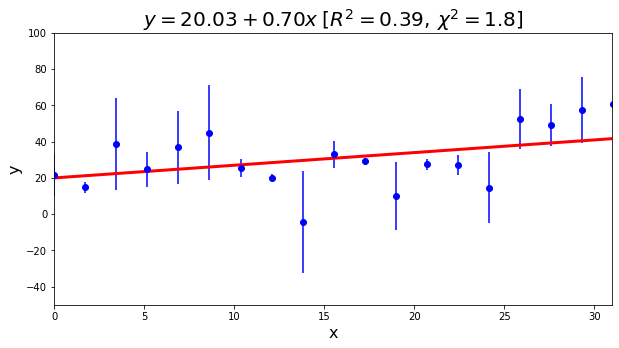

In [4]:

p = np.polyfit(x, y, 1)  # coefficients and covariance matrix
yfit = np.polyval(p, x)                            # evaluate the polynomial at x
resid = y - yfit                                        # residual 
SS_res =  np.sum(resid**2) 
chi2red = np.sum((resid/yerr)**2) /(y.size - 2)        # chi_square
R2 = 1.0 - SS_res/SS_total                   # coefficient of determination between x and y


plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr=yerr, fmt = 'bo', ecolor='b', capsize=0)
plt.plot(x, yfit, 'r', linewidth=3)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('$y = %.2f + %.2f x \; [R^2=%.2f,\, \chi^2=%.1f]$' %(p[1], p[0],  R2, chi2red), fontsize=20, color=[0, 0, 0])  
plt.xlim((0, n+1))
plt.ylim((-50, 100))
plt.show()

The curve fitting by a line considering the uncertainty:

In [5]:
p_unc= np.polyfit(x, y, 1, w=1/yerr)  # coefficients and covariance matrix
yfit_unc = np.polyval(p_unc, x)          # evaluate the polynomial at x
resid_unc = y - yfit_unc                                        # residual 
SS_res_unc =  np.sum(resid_unc**2) 
chi2_unc = np.sum((resid/yerr)**2) /(y.size - 2)        # chi_square
R2_unc = 1.0 - SS_res_unc/SS_total                   # coefficient of determination between x and y


And the plot:

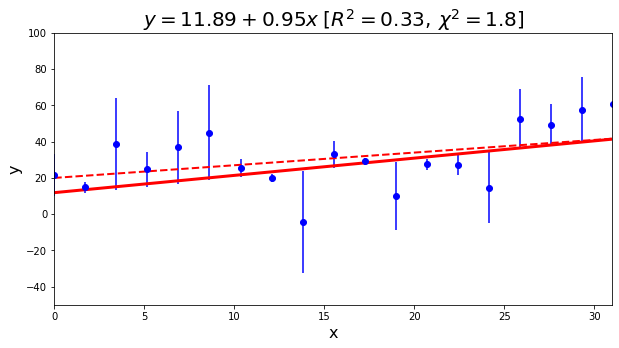

In [6]:
plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr=yerr, fmt = 'bo', ecolor='b', capsize=0)
plt.plot(x, yfit, 'r--', linewidth=2)
plt.plot(x, yfit_unc, 'r', linewidth=3)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('$y = %.2f  + %.2f x \; [R^2=%.2f,\, \chi^2=%.1f]$' %(p_unc[1],  p_unc[0],  R2_unc, chi2_unc), fontsize=20, color=[0, 0, 0])  
plt.xlim((0, n+1))
plt.ylim((-50, 100))
plt.show()

#### Exercise:  write a linearfit function 

In [7]:
def linearfit(x, y, yerr=None):
    w = None if (yerr is None or np.sum(yerr)==0) else 1/yerr
    p = np.polyfit(x, y, 1, w=w)  # coefficients and covariance matrix
    yfit = np.polyval(p, x)          # evaluate the polynomial at x
    
    SS_total = np.var(y)*y.size
    resid = y - yfit                                        # residual 
    SS_res =  np.sum(resid**2) 
    
    chi2red = None if  (yerr is None or np.sum(yerr)==0) else   np.sum((resid/yerr)**2) /(y.size - 2)        # chi_square
    R2 = 1.0 - SS_res/SS_total                   # coefficient of determination between x and y

    return yfit, p, R2, chi2red, resid

We could apply a statistical test to verify if the data above is normallly distributed, but for now, by visual inspection, the residuals indeed seem to be normallly distributed.

### The effect of uncertainty on the curve fitting

To demonstrate the effect of uncertainty on the curve fitting, let's plot the same (x, y) values but with different errors:

In [8]:
# data
x    = np.array([1, 2, 3, 4, 5])
y    = np.array([1, 2, 3, 6, 4])
yerr = np.array([[0, 0, 0, 0, 0], # no error
                 [1, 1, 1, 1, 1], # same error for all points
                 [1, 1, 1, .5, 2], # larger error for the 4th point
                 [1, 1, 1, 2, .5]]) # larger error for the last point

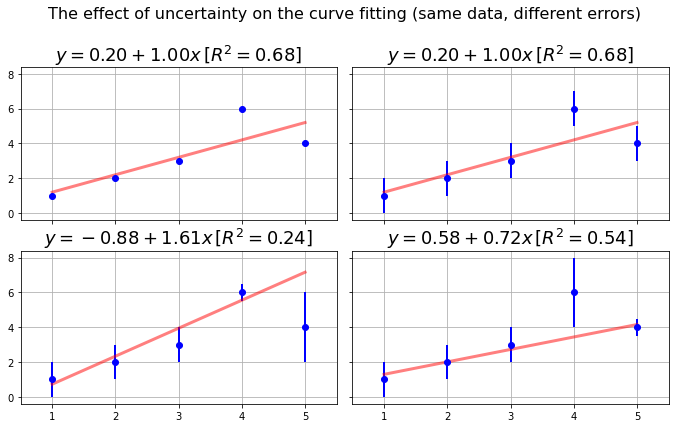

In [9]:
# plot
fig, ax = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
axs = ax.flatten()
for i, ax in enumerate(axs):
    yf, p, R2, chi2red, resid = linearfit(x, y, yerr=yerr[i, :])
    ax.errorbar(x, y, yerr=yerr[i, :], fmt = 'bo', ecolor='b', capsize=0, elinewidth=2)
    ax.plot(x, yf, 'r', linewidth=3, color=[1, 0, 0, .5])
    ax.set_title('$y = %.2f + %.2f x \, [R^2=%.2f]$'
                   %(p[1], p[0], R2), fontsize=18)  
    ax.grid()

ax.set_xlim(0.5, 5.5)
fig.subplots_adjust(bottom=0.1, left=.05, right=.95, hspace=.2, wspace=.05)
plt.suptitle('The effect of uncertainty on the curve fitting (same data, different errors)',
             fontsize=16, y=1.02)
plt.show()

From figure above, if the errors (weights) are all equal, the fitting is the same as if we don't input any error (first line).   
When the errors are different across data, the uncertainty has a strong impact on the curve fitting (second line).

### Be careful when interpreting the fitting results

We have to be carefull in interpreting the results of a curve fitting to determine whether the fitted model truely captures the relation between the independent variable (predictor) and the dependent variable (response).

An illustrative example to demonstrate that the result of a curve fitting is not necessarily an indicator of the phenomenon being modelled is the [Anscombe's quartet](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) data. These four sets of data have very similar basic statistical properties and linear fitting parameters, but are very different when visualized. Let's work with these data:

In [10]:
# Anscombe's quartet data
x =  np.array([[10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
               [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
               [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
               [8,  8,  8, 8,  8,  8, 8, 19, 8, 8, 8]])
y = np.array([[8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
              [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
              [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
              [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]])
# basic descriptive statistics
print("The Anscombe's quartet data ha)ve the same basic statistical properties:")
print('Mean of x    :', np.mean(y, axis=1))
print('Variance of x:', np.var(y, axis=1))
print('Mean of y    :', np.mean(y, axis=1))
print('Variance of y:', np.var(y, axis=1))

The Anscombe's quartet data ha)ve the same basic statistical properties:
Mean of x    : [7.50090909 7.50090909 7.5        7.50090909]
Variance of x: [3.75206281 3.75239008 3.74783636 3.74840826]
Mean of y    : [7.50090909 7.50090909 7.5        7.50090909]
Variance of y: [3.75206281 3.75239008 3.74783636 3.74840826]


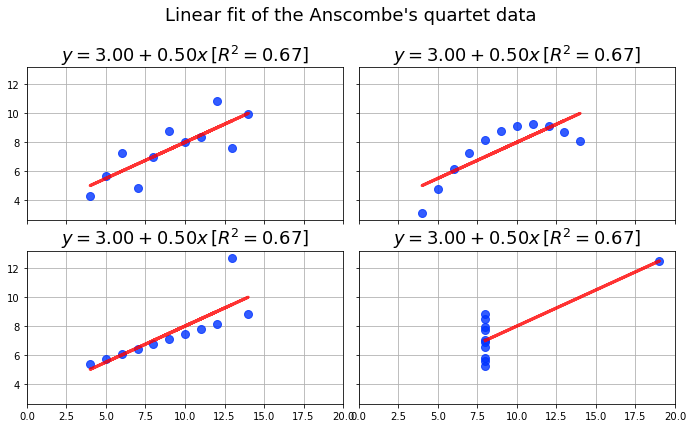

In [11]:
# plot
fig, ax = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
axs = ax.flatten()
resid = np.empty_like(y)
for i, ax in enumerate(axs):
    yf, p, R2, chi2red, resid[i, :] = linearfit(x[i, :], y[i, :])
    ax.plot(x[i, :], y[i, :], color=[0, .2, 1, .8], marker='o', linestyle='', markersize=8)
    ax.plot(x[i, :], yf, 'r', linewidth=3, color=[1, 0, 0, .8])
    ax.set_title('$y = %.2f + %.2f x \, [R^2=%.2f]$' %(p[1], p[0], R2), fontsize=18)  
    ax.grid()

ax.set_xlim(0, 20)
fig.subplots_adjust(bottom=0.1, left=.05, right=.95, hspace=.2, wspace=.05)
plt.suptitle("Linear fit of the Anscombe's quartet data",
             fontsize=18, y=1.02)
plt.show()

Exactly the same model fits very different data.   
We should be very carefull in interpreting the result of a curve fitting as a description of a phenomenon.
This example teaches us that we need to be very careful when intepreting the fitting result.

## 5. Non-linear Data Fitting

In reality, most of the problems are non-linear. In many cases, a non-linear fitting problem can be converted to linear fitting problem. For example:
    
$$ 
y=a{{x}^{b}}\to \ln y=\ln a+b\ln x 
$$

$$ 
y=\frac{1}{(a+bx)}\to 1/y=a+bx
$$

However, if the function is too complex to convert, we have to do non-linear data fitting

A more general curve fitting function is the `scipy.optimize.curve_fit`:

    scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, **kw)[source]
        Use non-linear least squares to fit a function, f, to data.
        
For the `curve_fit` funcion, we need to define a model (e.g., a mathematical expression) for the fit:

    f : callable
    The model function, f(x, ...). It must take the independent variable as the first argument and the parameters to fit as separate remaining arguments.
    
     p0 : None, scalar, or N-length sequence
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be determined using introspection, otherwise a ValueError
        is raised).
    sigma : None or M-length sequence, optional
        If not None, the uncertainties in the ydata array. These are used as
        weights in the least-squares problem
        i.e. minimising ``np.sum( ((f(xdata, *popt) - ydata) / sigma)**2 )``
        If None, the uncertainties are assumed to be 1.
  


In [2]:
# Import the necessary libraries
from scipy.optimize import curve_fit
from IPython.display import display, Math

In [3]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like or object
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, but can actually be any object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
        Initial guess for the parameters (length N). If None, then the
        initi

### Example: Gaussuian signal with noise

Similar to the linear fitting, non-linear fitting also requires a "model" to guide the fitting process. Let's look at an exmple below. 
  
  First, let generate a Guassian distribution function

In [9]:
def func(x, a, b, c, d):
    # Gauss function
    return a*np.exp(-(x-b)**2/(2*c**2)) + d

display(Math( r'y = a * exp\left(-\frac{(x-b)^2}{2c^2}\right) + d' ))

<IPython.core.display.Math object>

Now, let's use this function to generate some "fake" data to be fitted. ** Note that in reality, we have to figure out what function to use **

In [10]:
x = np.linspace(0, 8, 101)
noise = np.random.randn(len(x)) + 1
y = func(x, 10, 4, 1, np.mean(noise)) + noise
yerr = np.abs(np.random.randn(len(x))) + 1

Perform the curve fitting:

In [11]:
p,pcov  = curve_fit(func, x, y, sigma=yerr)
yfit = func(x, p[0], p[1], p[2], p[3])
resid = y - yfit
chi2red = np.sum((resid/yerr)**2)/(y.size - 3)
perr = np.sqrt(np.diag(pcov)) 

print('Fitted parameters:')
display(Math( r'a=%.2f \pm %.2f'   %(p[0], perr[0]) ))
display(Math( r'b=%.2f \pm %.2f'   %(p[1], perr[1]) ))
display(Math( r'c=%.2f \pm %.2f'   %(p[2], perr[2]) ))
display(Math( r'd=%.2f \pm %.2f'   %(p[3], perr[3]) ))
display(Math( r'\chi^2_{red}=%.2f' %(chi2red) ))

Fitted parameters:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Plot data and fitted curve:

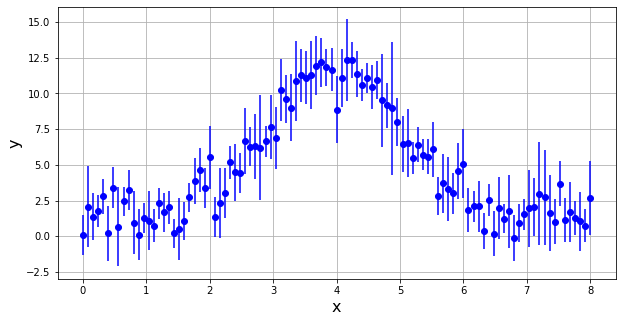

In [13]:
plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr=yerr, fmt = 'bo', ecolor='b', capsize=0)
#plt.plot(x, yfit, 'r', linewidth=3, color=[1, 0, 0, .5])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(True)
plt.show()

Note that, because non-linear model and fitting usually involve more parameters, and therefore have more degrees of freedom. Without any supervison, the fitting results can be wrong (technicially it is not wrong but just not what we are looking for). 

To guide the fitting, we usually need to give the fitting model a good initial guess for the parameters (`p0`) to be fitted.  What is a good guess of the parameters for the example above?

Fitted parameters:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

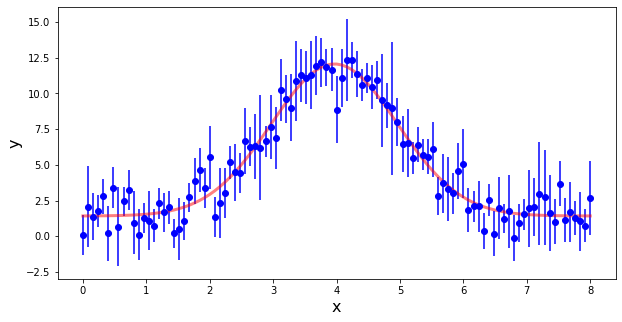

In [15]:
first_guess=[1,4,1,5]
p, cov = curve_fit(func, x, y, p0=first_guess, sigma=yerr)
yfit = func(x, p[0], p[1], p[2], p[3])
perr = np.sqrt(np.diag(cov))       # standard-deviation estimates for each coefficient
resid = y - yfit
chi2red = np.sum((resid/yerr)**2)/(y.size - 3)

print('Fitted parameters:')
display(Math( r'a=%.2f \pm %.2f'   %(p[0], perr[0]) ))
display(Math( r'b=%.2f \pm %.2f'   %(p[1], perr[1]) ))
display(Math( r'c=%.2f \pm %.2f'   %(p[2], perr[2]) ))
display(Math( r'd=%.2f \pm %.2f'   %(p[3], perr[3]) ))
display(Math( r'\chi^2_{red}=%.2f' %(chi2red) ))

plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr=yerr, fmt = 'bo', ecolor='b', capsize=0)
plt.plot(x, yfit, 'r', linewidth=3, color=[1, 0, 0, .5])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

#### Exercise 1:  non-linear fit Tau vs. Reflectance

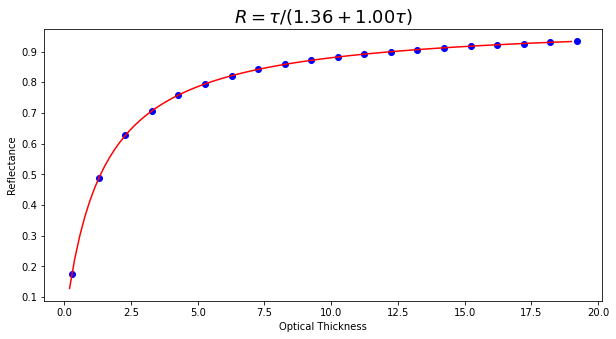

In [19]:
Tau = np.array([  0.299,        1.29400003 ,  2.28900003  ,  3.28399992,   4.27899981,
   5.27399969 ,  6.26900005 ,  7.26399994,   8.25900078 ,  9.25400066,
  10.2490005,   11.2440004 ,  12.2390003,   13.2340002 ,  14.2290001,
  15.2240009 ,  16.2189999 ,  17.2140007   ,18.2089996 ,  19.2040005 ])

Ref = np.array([ 0.17678887,  0.48721159 , 0.62823123 , 0.70785129,  0.75912076,  0.79498094,
  0.82153791,  0.84198004,  0.85822612,  0.87143803,  0.8823905,   0.89163792,
  0.89952338,  0.90634716,  0.91229314 , 0.91752762,  0.92218465,  0.92633438,
  0.93006754,  0.93343675])


def Ref_Tau(Tau,a,b):
    return Tau/(a+b*Tau)

p,pcov = curve_fit(Ref_Tau,Tau,Ref)
Tau_fit = np.linspace(0.2,19,100)
Ref_fit = Ref_Tau(Tau_fit,p[0],p[1])

fig,ax = plt.subplots(figsize=[10,5])
ax.plot(Tau,Ref,'bo')
ax.plot(Tau_fit,Ref_fit,'r')
ax.set_xlabel('Optical Thickness')
ax.set_ylabel('Reflectance')
ax.set_title(r'$R = \tau / (%.2f + %.2f \tau) $' %(p[0], p[1]), fontsize=18)  
plt.show()
# yf, p, R2, chi2red, resid= linearfit(1.0/Tau, 1.0/Ref)
# fig,ax = plt.subplots(figsize=[10,5])
# ax.plot(1.0/Tau, 1.0/Ref,' bo')
# ax.plot(1.0/Tau, yf,'r')
# print(p)